# SOFTMAX REGRESSION

## 1. Giới thiệu
- INPUT: một vector các giá trị số thực
- OUTPUT: các giá trị thuộc khoảng (0,1) và tổng các giá trị = 1
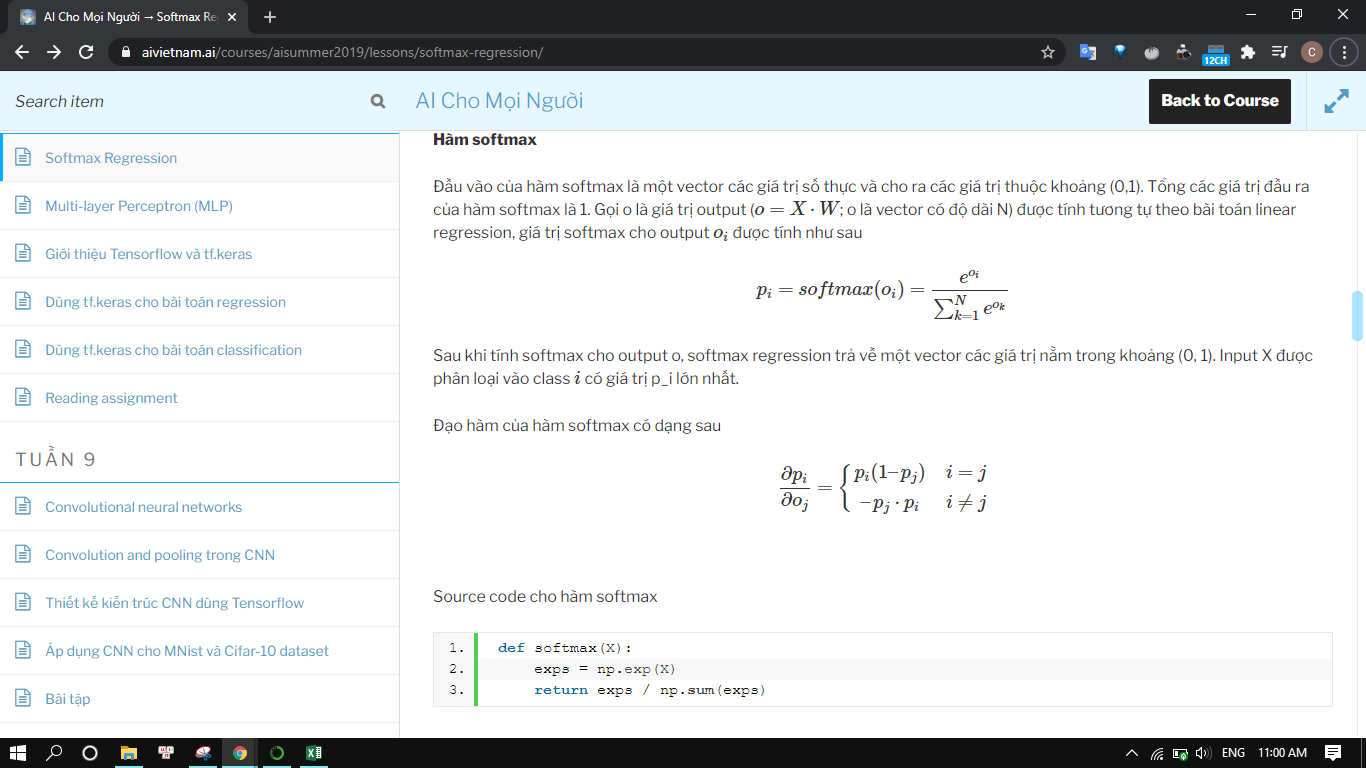

- Đọc phần này sẽ hiểu hơn về code ở dưới: 
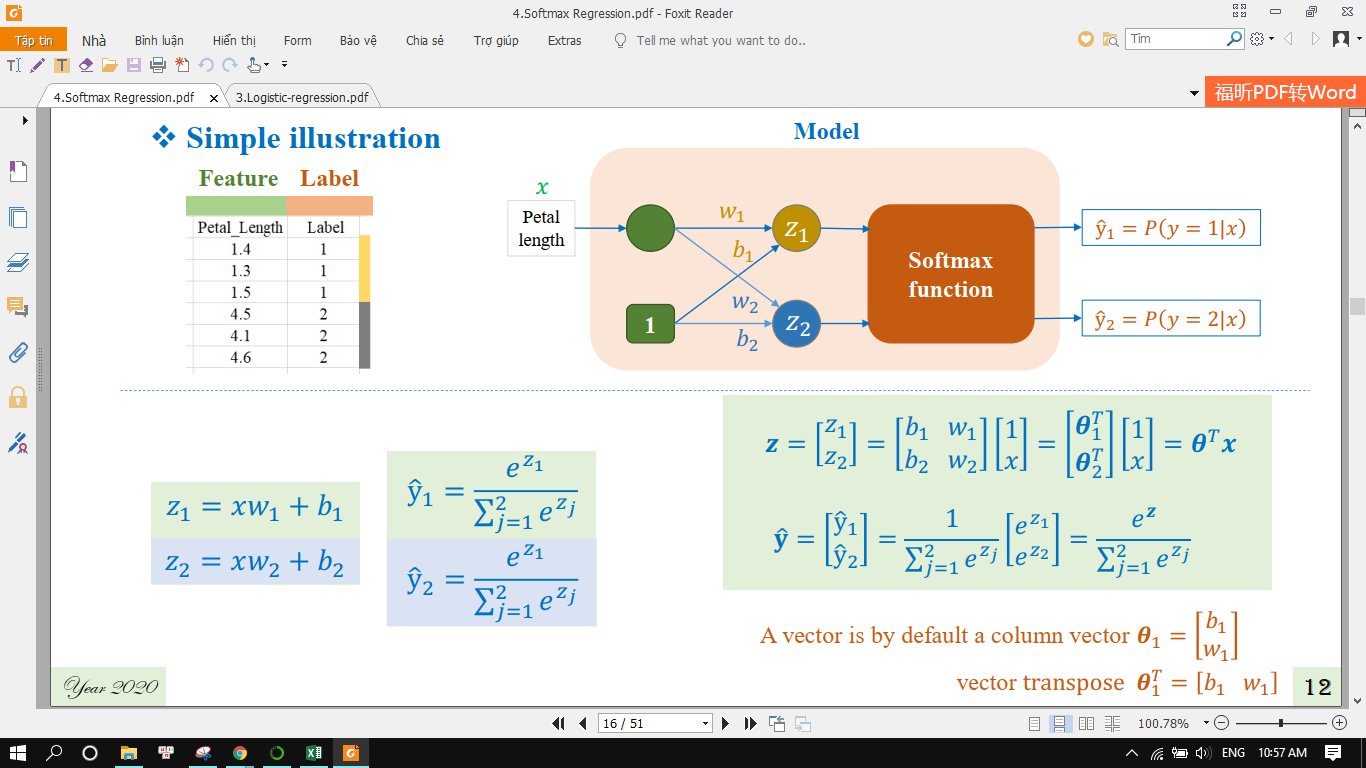

### Khi dữ liệu quá lớn ta nên xử lý trước 
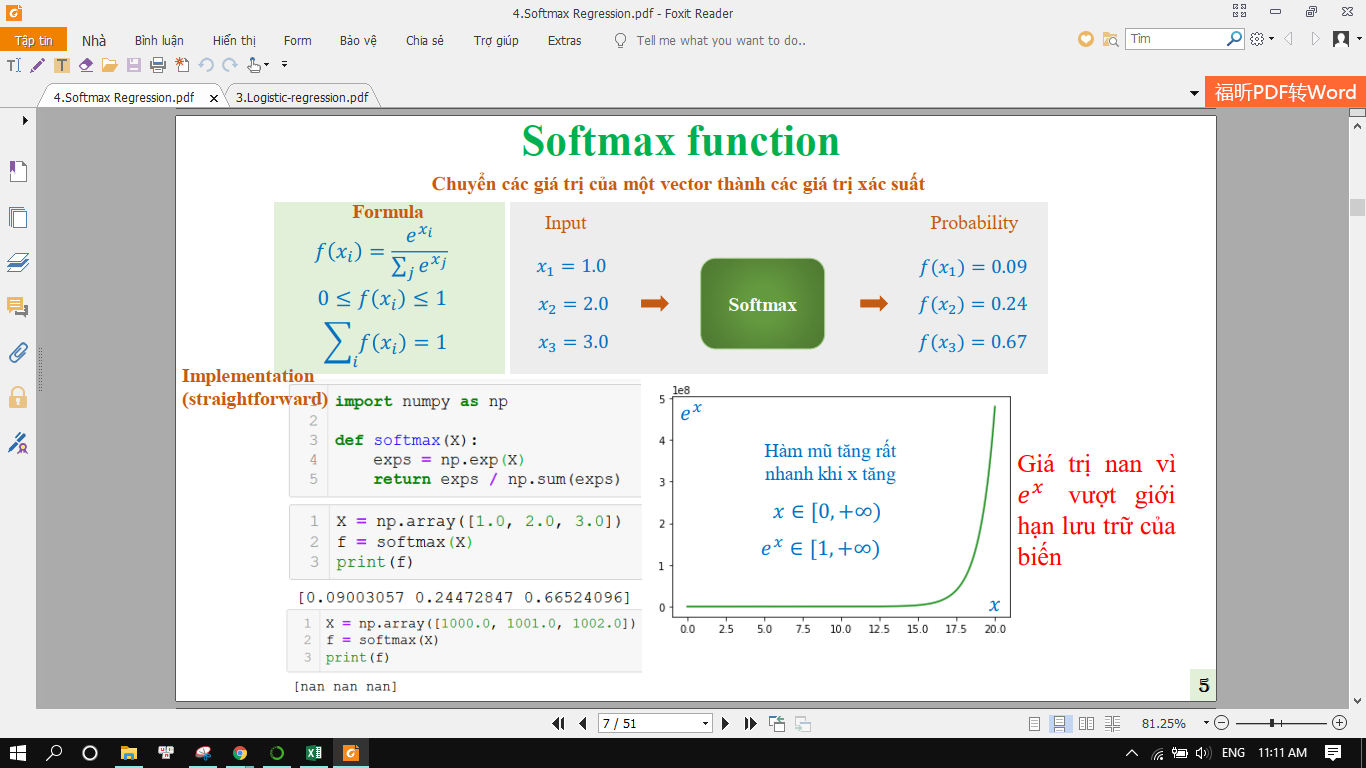

- Bằng cách: Lấy ARR - max(ARR)
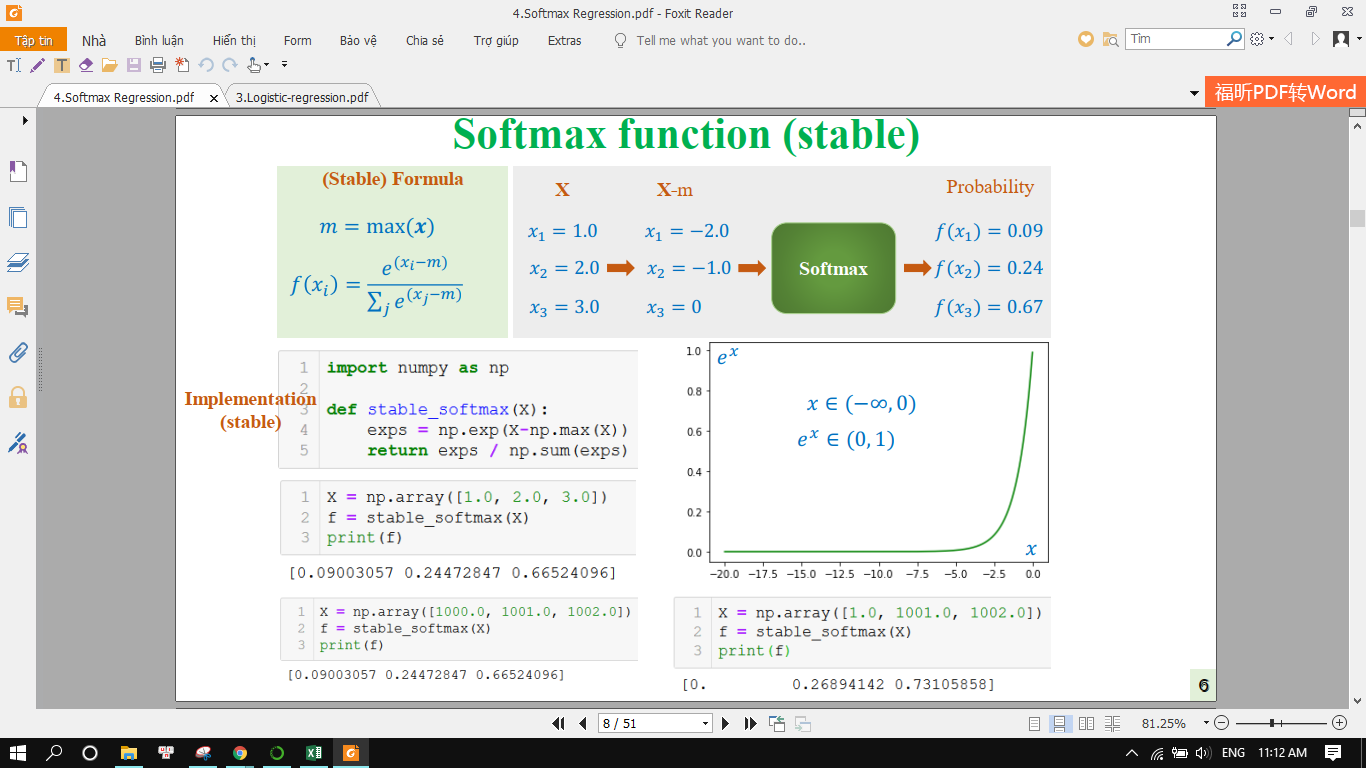

## 2. Tính LOSS bằng CROSS ENTROPY
- LOSS = TỔNG(-yi*log(pi)) (yi là giá trị của class, pi là xác suất xảy ra class đó)
- Gradient_loss = pi - yi   
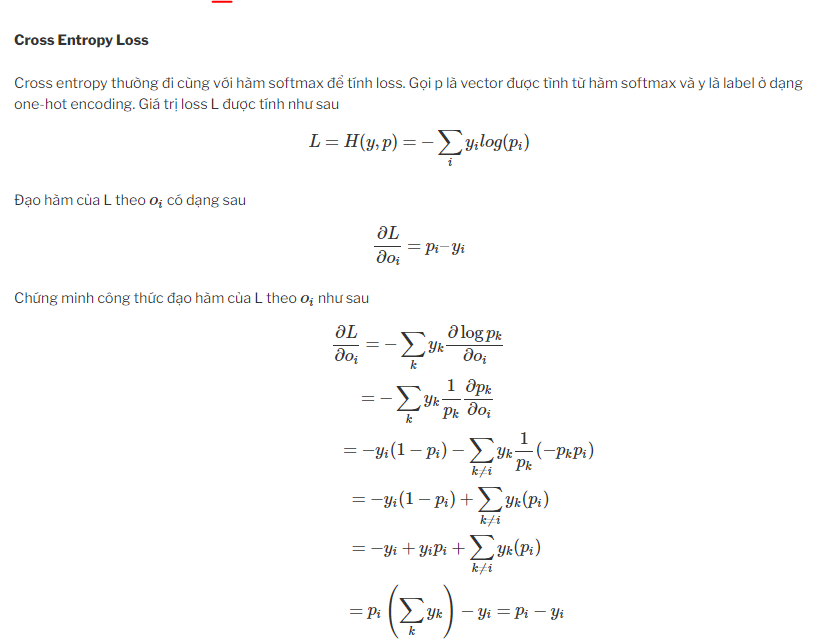

## 3. Áp dụng cho bài toán phân loại hoa với mẫu dữ liệu như sau
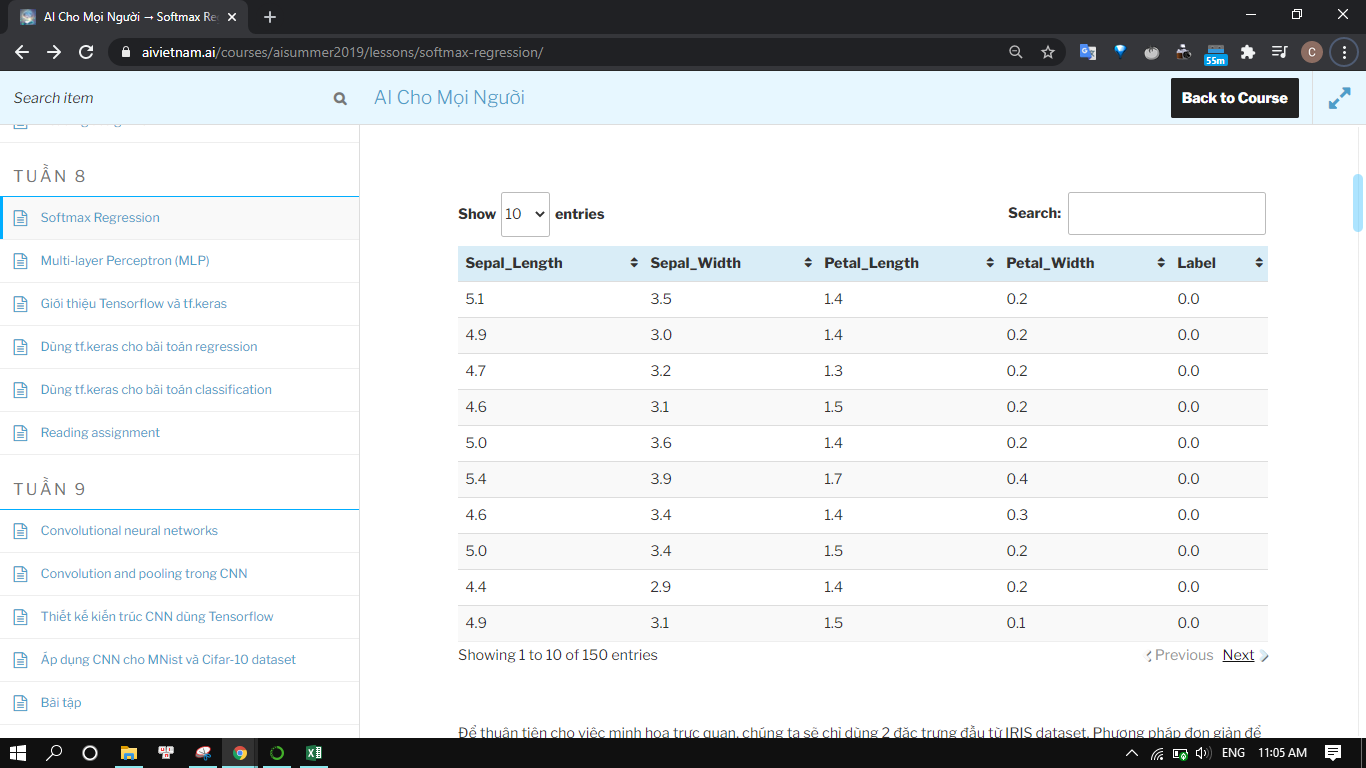
Bộ dữ liệu Iris có 150 mẫu dữ liệu cho 3 loài hoa, và có 4 đặc trưng. Trong phần này, chúng ta sẽ sử dụng 2 đặc trưng ở cột 3 và 4 để phân loại 3 loài hoa Iris. Source code để đọc bộ dữ liệu Iris và hiển thị như sau

[[-1.34022653 -1.3154443 ]
 [-1.34022653 -1.3154443 ]
 [-1.39706395 -1.3154443 ]
 [-1.2833891  -1.3154443 ]
 [-1.34022653 -1.3154443 ]]
--------------------
(150,)


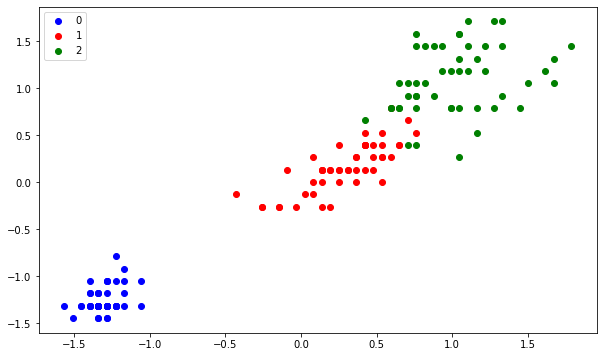

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy.core.defchararray as np_f

X = np.genfromtxt('data/iris.csv', dtype = float, delimiter = ',',usecols = [2,3], skip_header = 1)
Y = np.genfromtxt('data/iris.csv', dtype = str, delimiter = ',',usecols = [4], skip_header = 1)
# CHuẩn hoá X
X = preprocessing.scale(X)
print(X[:5])
print('--'*10)

#Chuẩn hoá Y
categories = np.unique(Y)
for i in range(categories.size):
    Y = np_f.replace(Y,categories[i], str(i))
Y = Y.astype(float)
print(Y.shape)

#Chưa chuẩn hoá
plt.figure(figsize = (10,6))
plt.scatter(X[Y == 0][:,0], X[Y==0][:,1], color = 'b', label = '0' )
plt.scatter(X[Y == 1][:,0], X[Y == 1][:,1], color = 'r', label = '1')
plt.scatter(X[Y == 2][:,0], X[Y == 2][:,1], color = 'g', label = '2')
plt.legend()

# #Đã chuẩn hoá 
# plt.figure(figsize = (10,6))
# plt.scatter(X1[Y == 0][:,0], X1[Y==0][:,1], color = 'b', label = '0' )
# plt.scatter(X1[Y == 1][:,0], X1[Y == 1][:,1], color = 'r', label = '1')
# plt.scatter(X1[Y == 2][:,0], X1[Y == 2][:,1], color = 'g', label = '2')
# plt.legend()
plt.show()

In [2]:
## TỰ CODE MÀ BỊ SAI =((
# num_xamples = X.shape[0]
# print(num_xamples)
# X_b = np.c_[np.ones((X.shape[0],1)), X]
# W = np.random.rand(3)
# #print(X_b.shape)
# lr = 0.01
# losses = []
# #print(Y.shape)

# for i in range(1):
#     output = np.dot(X_b, W) #(150,3)x(3,) = (150,)
#     exp_output = np.exp(output)
#     #Class probabilities
#     probs = exp_output/np.sum(exp_output) # (150,)
#     #print('sum: ',probs.sum()) # =1 (chuẩn)
#     print(probs)
#     #print(probs.shape)
#     loss = -np.dot(Y, np.log(probs))/num_xamples #(150,)x(150,) = số
#     #print(loss)
#     if i % 5 == 0:
#         losses.append(loss)
#     # compute the gradient on scores
#     #print(X_b.shape)
#     #print((probs - Y).shape)
#     gradients =np.dot(X_b.T, (probs - Y))/num_xamples #(3,100)x(100,)
#     # backpropate the gradient to the parameters (W,b)
#     W -= lr*gradients
# print(Y[:5])


In [46]:
# x_axis = range(len(losses))
# x_axis = np.array(x_axis)*5
# plt.plot(x_axis, losses, color = 'b')
# plt.show()
# print(losses)

In [61]:
N = 50 # number of points per class
D = 2  # dimensionality - số feature
K = 3  # number of classes - số class
# initialize parameters randomly
W = 0.01 * np.random.randn(D,K) #(2,3)
b = np.zeros((1,K))
# gradient descent loop
num_examples = X.shape[0]
learning_rate = 0.05
losses = []
y = Y.astype(int)
#print(y)
for i in range(100000):  
    # evaluate class scores
    #print(X.shape)
    scores = np.dot(X, W) + b # (150,2)x(2,3) = (150,3) + (1,3) = (150,3)
    #print(scores.shape)
    # compute the class probabilities
    exp_scores = np.exp(scores)
    #print(exp_scores[:5])
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) ## Tổng theo từng hàng
    #print(probs[0])
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y]) # (150,) lấy trong hàng a (có 3 giá trị 0, 1, 2) lấy tương ứng với y (công thức: -y*log(p))
    loss = np.sum(corect_logprobs)/num_examples # loss trung bình của 150 hàng data
#     if i %999 == 0:
#         print(probs[50])
#         print(corect_logprobs[50])
        
    #print(loss)
    if i % 5 == 0:        
        losses.append(loss)
    # compute the gradient on scores
    dscores = probs # Làm ảnh hướng đến kết quả probs
    #print(dscores[:2])
    dscores[range(num_examples),y] -= 1
    #print(dscores[:2])
    dscores /= num_examples
    #print(dscores[:2])
    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X.T, dscores) #(2,150)x(150,3) = (2,3)
    #print('â: ',dW)
    db = np.sum(dscores, axis=0, keepdims=True) # (1,3)
    #print(db.shape)
    # perform a parameter update
    W += -learning_rate * dW
    b += -learning_rate * db
    


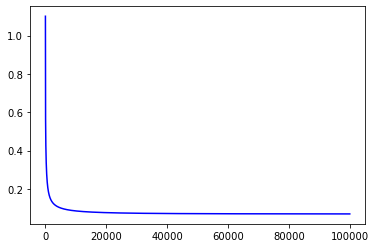

loss đầu:  [1.100809919311719, 0.9652652410682161] loss cuối:  0.06924776570389672


In [62]:
x_axis = range(len(losses))
x_axis = np.array(x_axis)*5
plt.plot(x_axis, losses, color = 'b')
plt.show()
print('loss đầu: ',losses[:2],'loss cuối: ',losses[-1] )

In [63]:
score  = np.dot(X, W)
#print(score)
predict_class = np.argmax(scores, axis = 1)
#print(predict_class)
print('Training accuracy: %.2f' %(np.mean(predict_class == y)))

Training accuracy: 0.96


(-2.4470764792980413, 2.702923520701849)

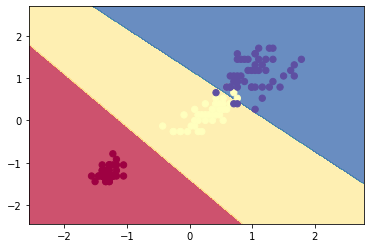

In [52]:
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [58]:
# TỰ CODE LẠI VÀ PHÂN TÍCH
N = 50 # number of points per class
D = 3  # dimensionality - số feature (thêm 1 vào trước 2 data đầu vào là tham số của b)
K = 3  # number of classes - số class
X_b = np.c_[np.ones((X.shape[0],1)), X] # X(3,3)

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K) #W(3,3) (đáng ra là (2,3) vì D thêm 1 nên phải (3,3))
#b = np.zeros((1,K))
# gradient descent loop
num_examples = X.shape[0]
learning_rate = 0.05
losses = []
y = Y.astype(int)
#print(y)
for i in range(1000):  
    # evaluate class scores
    #print(X.shape)
    scores = np.dot(X_b, W)  # (150,3)x(3,3) = (150,3)
    #print(scores.shape)
    # compute the class probabilities
    exp_scores = np.exp(scores)
    #print(exp_scores[:5])
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) ## Tổng theo từng hàng
    #print(probs[0])
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y]) # (150,) lấy trong hàng a (có 3 giá trị 0, 1, 2) lấy tương ứng với y (công thức: -y*log(p))
    loss = np.sum(corect_logprobs)/num_examples # loss trung bình của 150 hàng data
    if i %999 == 0:
        print('probs: ',probs.shape)
        print('corect_logprobs: ',corect_logprobs.shape)
        
    #print(loss)
    if i % 5 == 0:        
        losses.append(loss)
    # compute the gradient on scores
    dscores = probs # Làm ảnh hướng đến kết quả probs
    #print(dscores[:2])
    dscores[range(num_examples),y] -= 1 # dscore(150,3)
    if i %999 == 0:
        print('dscore: ',dscores[50])
    dscores /= num_examples
    #print(dscores[:2])
    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X_b.T, dscores) #(3,150)x(150,3) = (3,3)
    if i %999 == 0:
        print('dW: ',dW)
        print('sum: ',np.sum(dscores, axis = 0, keepdims = True))
    #print('â: ',dW)
    #db = np.sum(dscores, axis=0, keepdims=True) # (1,3)
    #print(db.shape)
    # perform a parameter update
    W += -learning_rate * dW
    #b += -learning_rate * db
    


probs:  (150, 3)
corect_logprobs:  (150,)
dscore:  [ 0.33708671 -0.66689843  0.32981172]
dW:  [[ 0.00132079  0.00100162 -0.00232241]
 [ 0.43921424 -0.09696239 -0.34225185]
 [ 0.42230691 -0.05729248 -0.36501443]]
sum:  [[ 0.00132079  0.00100162 -0.00232241]]
probs:  (150, 3)
corect_logprobs:  (150,)
dscore:  [ 0.01186683 -0.27829457  0.26642774]
dW:  [[ 0.00428038 -0.0158133   0.01153292]
 [ 0.01742583 -0.00043691 -0.01698892]
 [ 0.01525385  0.00542198 -0.02067583]]
sum:  [[ 0.00428038 -0.0158133   0.01153292]]


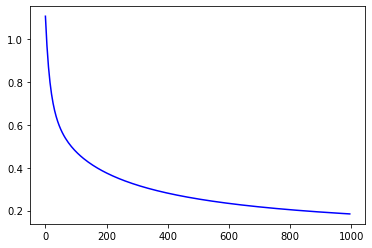

loss đầu:  [1.107243893609215, 0.9700260559204207] loss cuối:  0.18457220953562295


In [59]:
x_axis = range(len(losses))
x_axis = np.array(x_axis)*5
plt.plot(x_axis, losses, color = 'b')
plt.show()
print('loss đầu: ',losses[:2],'loss cuối: ',losses[-1] )

In [60]:
score  = np.dot(X_b, W)
print(score)
predict_class = np.argmax(scores, axis = 1)
print(predict_class)
print('Training accuracy: %.2f' %(np.mean(predict_class == y)))

[[ 5.08742811  1.66588755 -6.73639625]
 [ 5.08742811  1.66588755 -6.73639625]
 [ 5.21677416  1.64562539 -6.84591826]
 [ 4.95808207  1.6861497  -6.62687424]
 [ 5.08742811  1.66588755 -6.73639625]
 [ 4.16232484  1.62193425 -5.76930081]
 [ 4.81889555  1.61351767 -6.41713154]
 [ 4.95808207  1.6861497  -6.62687424]
 [ 5.08742811  1.66588755 -6.73639625]
 [ 5.22661464  1.73851958 -6.94613895]
 [ 4.95808207  1.6861497  -6.62687424]
 [ 4.82873602  1.70641186 -6.51735223]
 [ 5.35596068  1.71825743 -7.05566096]
 [ 5.74399883  1.65747096 -7.38422699]
 [ 5.34612021  1.62536324 -6.95544027]
 [ 4.42101693  1.58140995 -5.98834483]
 [ 4.67970902  1.54088564 -6.20738885]
 [ 4.81889555  1.61351767 -6.41713154]
 [ 4.4308574   1.67430413 -6.08856551]
 [ 4.6895495   1.63377982 -6.30760953]
 [ 4.69938997  1.72667401 -6.40783022]
 [ 4.42101693  1.58140995 -5.98834483]
 [ 5.6048123   1.58483893 -7.17448429]
 [ 3.89379227  1.56956438 -5.4500361 ]
 [ 4.44069788  1.76719832 -6.1887862 ]
 [ 4.82873602  1.70641186